# Agrupamento de Dados

### O que é? Para que serve? Onde vive?

- Técnica de ML para descrição de dados (e não para predição);

- Abordagem não supervisionada (em geral não possuímos o rótulo);

- É uma tarefa final, mas também uma tarefa meio;

- Útil para análise exploratória x Case de definição de persona para MKT;

- Ideia geral do agrupamento de dados: Objetos semelhantes estejam no mesmo grupo e objetos diferentes estejam em grupos diferentes;

- Relações de similaridade entre os exemplos. Minimizar a distância intra-cluster dos objetos e maximizar a distância inter-cluster dos objetos.


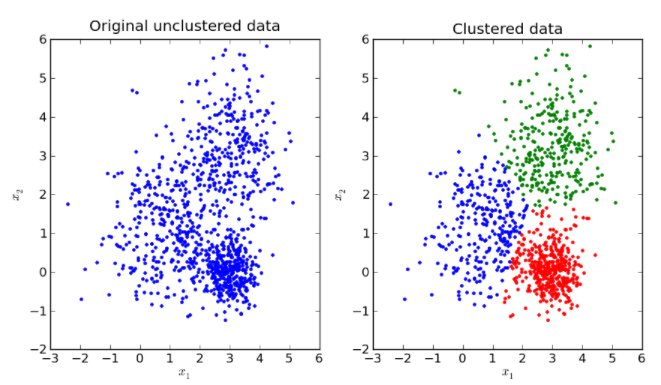

Existem dois principais problemas quando falamos sobre clusterização de dados:

1. Definição de grupos

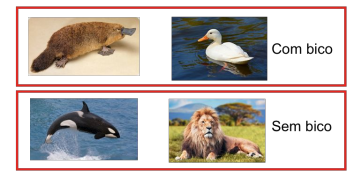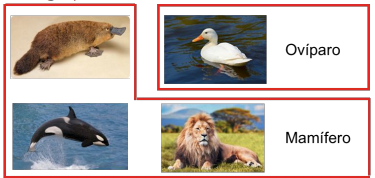

2. Quantidade de grupos

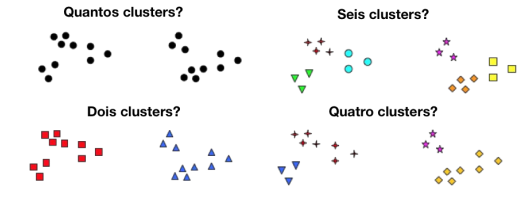

Graças as definições pouco precisas e distintas, e as dificuldades em definir similaridade, há vários algoritmos de agrupamento. Os três principais são:

#### Particionais (ex.: Baseados em Centroides - k-medias)

Cria k grupos separados no espaço, em que cada grupo possui ao menos um exemplo e cada exemplo pertence a exatamente um grupo.

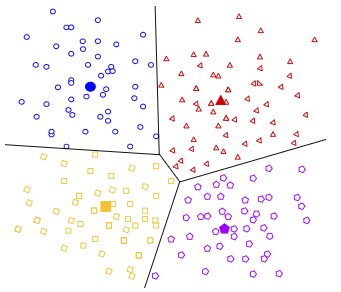

#### Hierarquicos (Aglomerativos, clusters dentro de clusters)

Constrói uma estrutura de hierarquia entre os clusters, em que, a cada nível, um númeo diferente de clusters é definido. Podem existir grupos dentro de grupos.

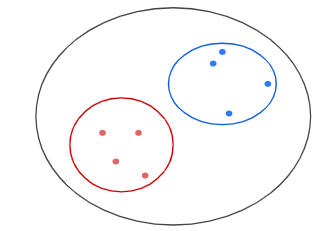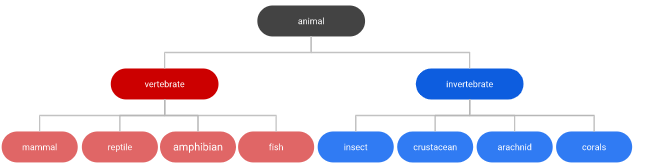

#### Baseados em densidade (DBSCAN)

A partir de sementes presentes em regiões de alta densidade, agrupa exemplos na vizinhança, até que se alcance regiões no espaço com baixa densidade, ou seja, não haja mais que um determinado numero de outros exemplos.

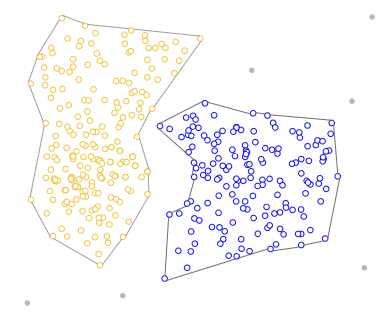

### Ideia geral segue o pipeline abaixo

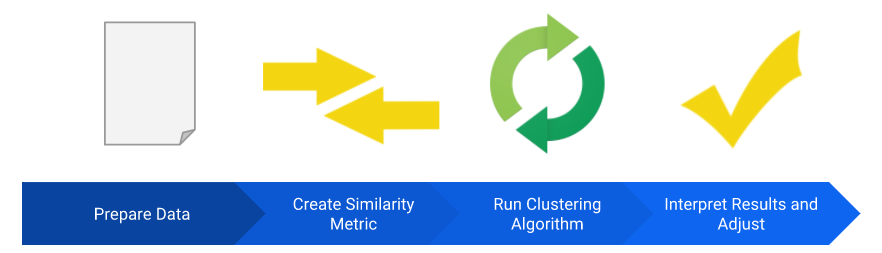

1. Como iremos trabalhar com distâncias entre os pontos é sempre muito interessante trabalhar com os dados numa escala plausível e normalizados. Além do mais, como vamos interpretar os dados posterior a criação dos grupos, é também interessante manter o menor número de campos possível.

2. Como distância entre os pontos, vamos utilizar a versão mais comum de Minkowski, mais especificamente falando com q = 2, no caso a Euclidiana.

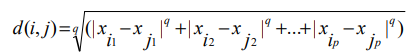

Mais ainda, poderíamos utilizar outros valores para q, como q = 1 (Manhattan), dependendo da sensibilidade que queremos dar para distâncias maiores ou ainda sim, outras métricas para distância como as de

Cosseno

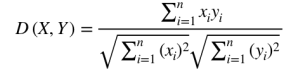

Pearson

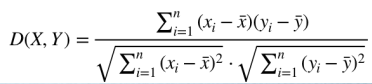

# Kmeans

#### Pontos fortes

- Um dos mais simples algoritmos de clusterização
- Bastante interpretável
- Computacionalmente eficiente

#### Ideia Geral

1. Selecione k pontos como centróides
2. Repita até que os centróides não mudem (ou tenham um movimento mínimo)
    * Forme k grupos associando todos os pontos ao centróides mais próximos
    * Calcule o centróide de cada grupo obtido (média entre as coordenadas de cada ponto)
    
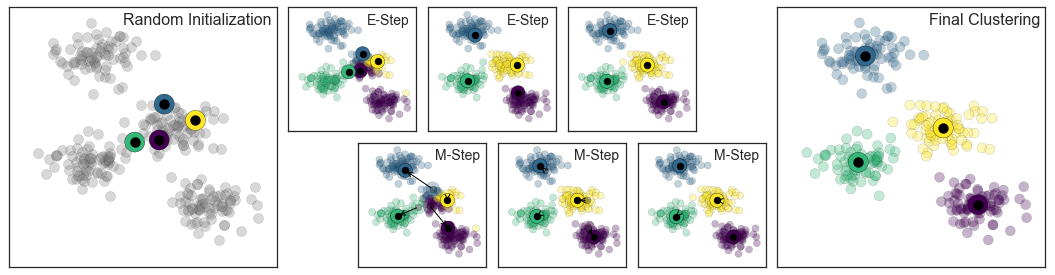
    
#### Pontos de atenção

- Sensível a posição inicial e tem que definir o k
- Sensível a outliers
- Não é capaz de identificar os clusters não globulares
- Suscetível a problemas quando os clusters são de diferentes densidades
- Suscetível a problemas quando os clusters são de diferentes tamanhos

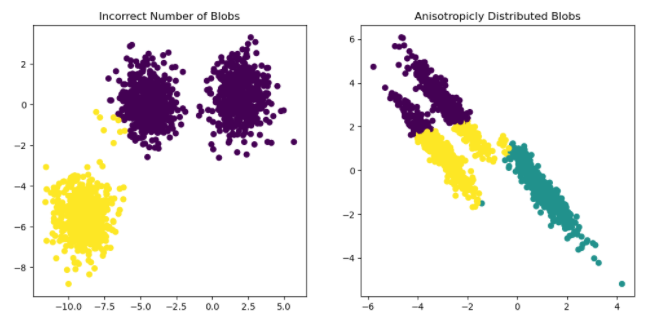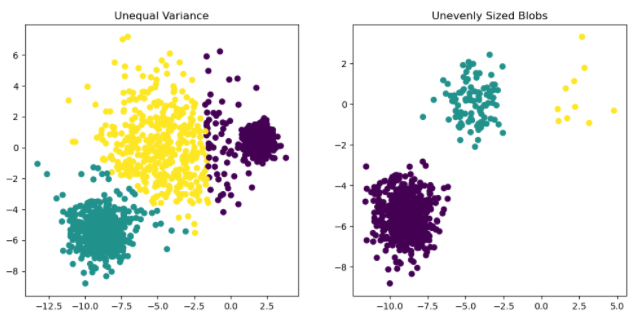

### Escolhendo o melhor número de K
#### Elbow method

Usado para encontrar o melhor valor de k, podemos usar a distância média dos pontos dentro de um cluster até o seu centróide (within-cluster sum of squares) para diferentes valores de k.

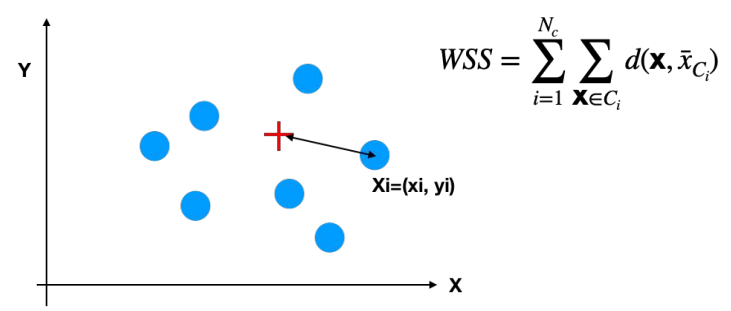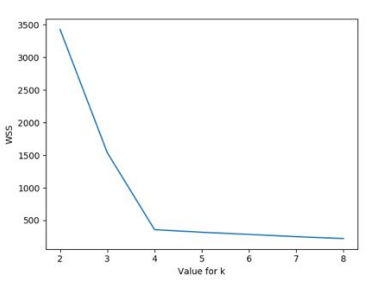

#### Silhouette score

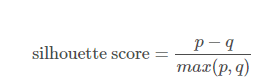

- p é a distância média para os pontos no cluster mais próximo do qual o ponto de dados não faz parte

- q é a distância média intra-cluster a todos os pontos em seu próprio cluster.

O valor do intervalo de pontuação da silhueta está entre -1 e 1.

Uma pontuação mais próxima de 1 indica que o ponto de dados é muito semelhante a outros pontos de dados no cluster,

Uma pontuação mais próxima de -1 indica que o ponto de dados não é semelhante aos pontos de dados em seu cluster.

## Agrupamento Hierarquico

Algoritmo que gera uma estrututa/sequência de partições aninhadas, tal que:

- Uma partição P1 está aninhada com uma partição P2, se cada grupo de P1 é um subconjunto de um grupo de P2.

Famoso: "Clusters dentro de clusters"

Robusto a outliers

Como não existe a necessidade de um centróide, a maior parte dos algoritmos hierárquicos são relacionais, operações de distância acontecem entre os pontos

Possibilita a visualização via dendogramas

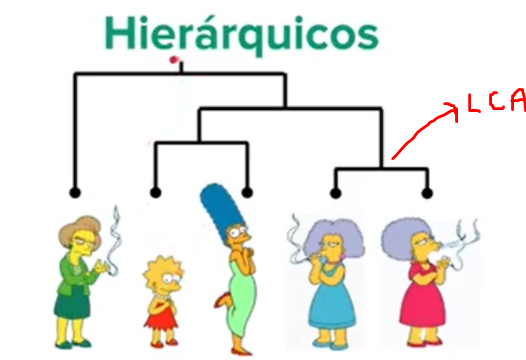 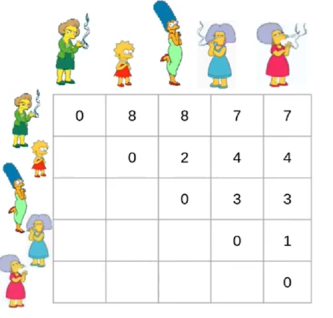

Distância entre os grupos é o LCA: Lowest Common Ancestor

### Ideia Geral

Existem duas maneiras de se iniciar o algoritmo: Aglomerativo x Divisivo.

0. Define-se uma métrica de proximidade. (euclidiana, por ex)
1. No aglomerativo, se inicial com a solução trivial, ou seja, os singletons. Unem-se as soluções parciais uma a uma, diminuindo em 1 o número de grupos a cada interação.
2. Define-se uma métrica de dimissimilaridade inter-cluster (mencionarei abaixo as opções) para a atualização da matriz de distâncias.
3. Unem-se os clusters até que o cluster final seja o que engloba todos os pontos.

O divisivo é a mesma coisa, só que ao contrário, se começa com o grupo com todos os exemplos e vai se dividindo até chegar nos singletons.

Métricas de distância inter-cluster:

- Single-linkage

A distância entre dois grupos é a menor distância entre dois pontos (par-a-par, um de cada grupo)

Ponto de Atenção: Encontra formas arbitrárias de grupos, porém é muito sensível a outliers e ruídos (formando pontes).

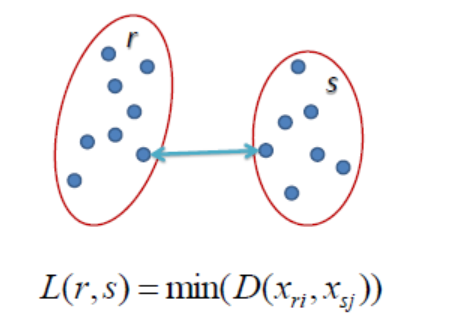

- Complete-Linkage

A distância entre dois grupos é a maior distância entre dois pontos (par-a-par, um de cada grupo).

Ponto de Atenção: Esse assim como os próximos tem a tendência de encontrar distâncias hiperesféricas.

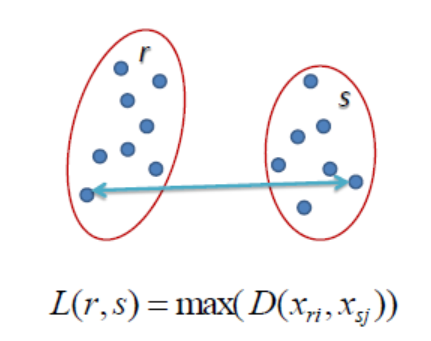

- Average-Linkage

Pega a distância média entre todas as distâncias par-a-par entre os grupos.

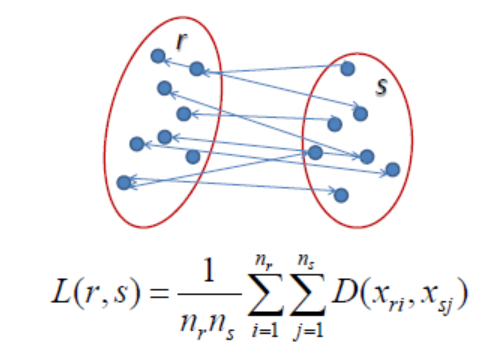

- Algoritmos de minimização de função objetivo (exemplo Ward's)

Essa, diferente das outras que olham as distâncias entre os pontos, olha para o centróide. De tal forma que a função abaixo seja minimizada:

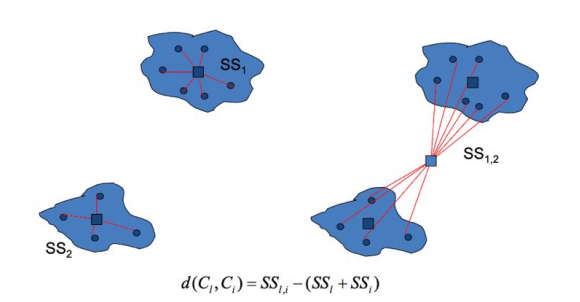

No final, podemos fazer um corte da arvore, transformando o agrupamento hierarquico num agrupamento partional.

## Métodos para avaliação de algorítmos de clusterização

- Externo

Quando a gente possui a classe original, podemos fazer diversas validações. Uma delas é a pureza! Mede quão puro é um cluster:

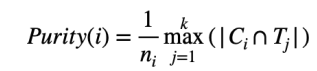

Exemplo com o dataset da iris, basicamente temos a "classe esperada", iee a quantidade original de elementos na clase vs a quantidade (nas linhas) que encontramos com o nosso agrupamento.

Pega-se o máximo em cada coluna e aplica-se na função:

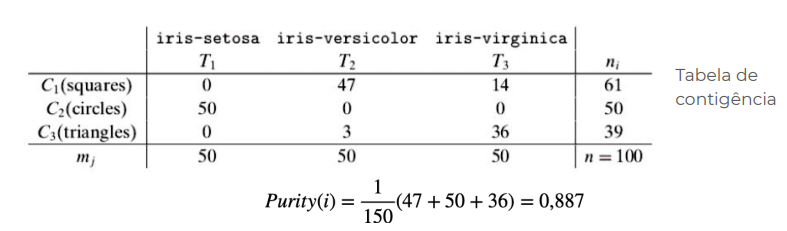

- Interno

Utilizar os métodos de erro quadrático, por exemplo, do elbow-method ou silhueta.

# Aplicação (Comportamento de consumo online)

### Visão geral

O conjunto de dados vem de transações e-commerce ocorridas entre 01/12/2010 e 09/12/2011 com clientes de uma loja com sede no Reino Unido. A empresa vende principalmente presentes personalizados para todas as ocasiões. Muitos clientes da empresa são atacadistas.

### Objetivo de Negócios

Nosso objetivo é segmentar os clientes com base em RFV para que a empresa possa direcionar seus clientes de forma eficiente.

As colunas que vamos definir adiante serão:

- R (Recencia): Número de dias desde a última compra
- F (Frequencia): Número de transações
- V (Valor): Total gasto com transações

### Preparação dos Dados

In [1]:
#Bibliotecas padrão para manipulação e análise dos dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.graph_objs as go
import plotly.offline as py

#Bibliotecas necessárias para a clusterização
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
#Leitura de dados
df = pd.read_excel('Online Retail.xlsx', header=0)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')
df['CustomerID'] = df['CustomerID'].astype(str)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
#Cardinalidade e outras medidas estatísticas simples
df.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [4]:
#Percentual de dados faltantes por campo
round(100*(df.isnull().sum())/len(df), 2)

InvoiceNo      0.00
StockCode      0.00
Description    0.27
Quantity       0.00
InvoiceDate    0.00
UnitPrice      0.00
CustomerID     0.00
Country        0.00
dtype: float64

In [5]:
#Para facilitar, vamos dropar os registros que tenham nulo
df = df.dropna()
df.shape

(540455, 8)

In [6]:
#Definição do atributo Valor
df['Valor'] = df['Quantity']*df['UnitPrice']
df_agregado = df.groupby('CustomerID')['Valor'].sum()
df_agregado = df_agregado.reset_index()
df_agregado.head()

,CustomerID,Valor
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [7]:
#Definição do atributo Frequencia
df_aux = df.groupby('CustomerID')['InvoiceNo'].count()
df_aux = df_aux.reset_index()
df_aux.columns = ['CustomerID', 'Frequencia']

#Junta os dois
df_agregado = pd.merge(df_agregado, df_aux, on='CustomerID', how='inner')
df_agregado.head()

,CustomerID,Valor,Frequencia
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [8]:
#Definição do atributo Recencia
df['Diff'] = max(df['InvoiceDate']) - df['InvoiceDate']

#Ultima transação de cada cliente em dias
df_aux = df.groupby('CustomerID')['Diff'].min()
df_aux = df_aux.reset_index()
df_aux['Diff'] = df_aux['Diff'].dt.days

#Junta tudo
df_agregado = pd.merge(df_agregado, df_aux, on='CustomerID', how='inner')
df_agregado.columns = ['Cliente', 'Valor', 'Frequencia', 'Recencia']
df_agregado.head()

,Cliente,Valor,Frequencia,Recencia
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


<AxesSubplot:>

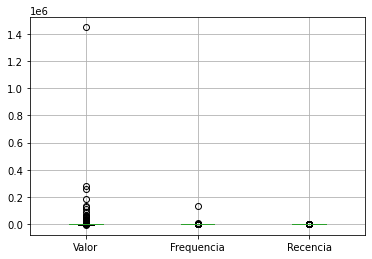

In [9]:
#Verificando a existência de outliers
df_agregado.boxplot()

In [10]:
#Remoção dos outliers em Valor
Q1 = df_agregado.Valor.quantile(0.05)
Q3 = df_agregado.Valor.quantile(0.95)
IQR = Q3 - Q1
df_agregado = df_agregado[(df_agregado.Valor >= Q1 - 1.5*IQR) & (df_agregado.Valor <= Q3 + 1.5*IQR)]

#Remoção dos outliers em Recencia
Q1 = df_agregado.Recencia.quantile(0.05)
Q3 = df_agregado.Recencia.quantile(0.95)
IQR = Q3 - Q1
df_agregado = df_agregado[(df_agregado.Recencia >= Q1 - 1.5*IQR) & (df_agregado.Recencia <= Q3 + 1.5*IQR)]

#Remoção dos outliers em Frequencia
Q1 = df_agregado.Frequencia.quantile(0.05)
Q3 = df_agregado.Frequencia.quantile(0.95)
IQR = Q3 - Q1
df_agregado = df_agregado[(df_agregado.Frequencia >= Q1 - 1.5*IQR) & (df_agregado.Frequencia <= Q3 + 1.5*IQR)]

In [11]:
#Normalizando os valores
df_agregado_norm = df_agregado[['Valor', 'Frequencia', 'Recencia']]
scaler = StandardScaler()
df_agregado_norm = scaler.fit_transform(df_agregado_norm)

df_agregado_norm = pd.DataFrame(df_agregado_norm)
df_agregado_norm.columns = ['Valor', 'Frequencia', 'Recencia']
#df_agregado_norm = df_agregado_norm[['Valor','Recencia']] #Se quisessemos visualizar a clusterização em 2d
df_agregado_norm.head()

,Valor,Frequencia,Recencia
0,-0.719522,-0.637581,2.307313
1,1.671218,0.790822,-0.902973
2,0.277400,-0.407450,-0.179668
3,0.255384,-0.074156,-0.734532
4,-0.534031,-0.518548,2.148780


## Algoritmo do K-médias

In [12]:
#Para aplicar o alg do k-means com um número de clusters arbitrário seria assim
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(df_agregado_norm)

KMeans(max_iter=50, n_clusters=4)

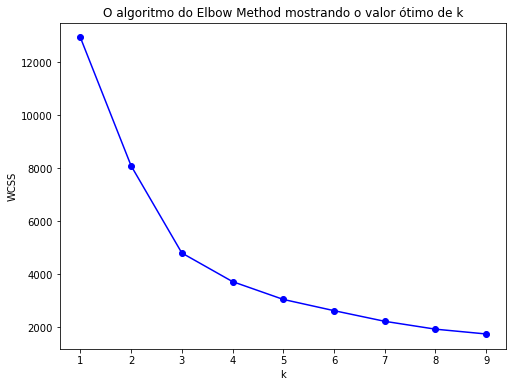

In [13]:
#Aplicando o método do cotovelo para identificar o número ótimo de clusters
WCSS= []
K = range(1,10)
# considerando diversos valores de k
for k in K: 
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_agregado_norm)
    # calcula a medida e armazena em uma lista 
    WCSS.append(kmeans.inertia_)

# mostra os resultados
plt.figure(figsize=(8,6))
plt.plot(K, WCSS, '-bo')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('O algoritmo do Elbow Method mostrando o valor ótimo de k')
plt.show()

In [14]:
#Como não ficou tão claro assim, vamos para a análise de silhueta
K = range(2,10)
for k in K:
    kmeans = KMeans(n_clusters=k, max_iter=50)
    kmeans.fit(df_agregado_norm)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_agregado_norm, cluster_labels)
    print("Para k={0}, o silhouette score é {1}".format(k, silhouette_avg))

Para k=2, o silhouette score é 0.5584679944881809
Para k=3, o silhouette score é 0.5214461489171658
Para k=4, o silhouette score é 0.4961556994808488
Para k=5, o silhouette score é 0.49462043851283105
Para k=6, o silhouette score é 0.4328985717530871
Para k=7, o silhouette score é 0.42917739476632505
Para k=8, o silhouette score é 0.4253639119428353
Para k=9, o silhouette score é 0.42392187994049985


In [15]:
#A inversão da curva acontece em k = 3, logo vamos fixar este k e persistir o dado
kmeans = KMeans(n_clusters=3, max_iter=50).fit(df_agregado_norm)
df_agregado['ClusterK'] = kmeans.labels_
df_agregado.head()

,Cliente,Valor,Frequencia,Recencia,ClusterK
0,12346.0,0.00,2,325,0
1,12347.0,4310.00,182,1,2
2,12348.0,1797.24,31,74,1
3,12349.0,1757.55,73,18,1
4,12350.0,334.40,17,309,0


In [16]:
#Plotagem dos pontos em 2D
'''
plt.figure(figsize=(12,6))
plt.subplot(1,2, 1)
plt.scatter(df_agregado['Valor'].values, df_agregado['Recencia'].values, cmap='viridis', s=50)
plt.title('Dados originais')

plt.subplot(1,2, 2)
plt.scatter(df_agregado['Valor'].values, df_agregado['Recencia'].values, c=df_agregado['ClusterK'].values,  cmap='viridis', s=50)
plt.title('Clusterizado pelo K-means')

plt.show(True)
'''
print('')

### Como ficou o padrão de consumo para cada cluster?

<AxesSubplot:xlabel='ClusterK', ylabel='Valor'>

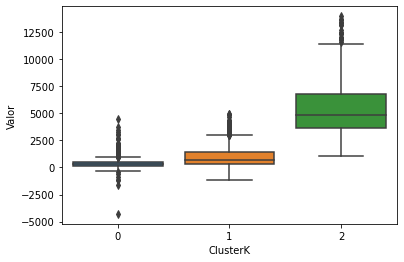

In [17]:
# Box plot para visualizar o Valor

sns.boxplot(x='ClusterK', y='Valor', data=df_agregado)

<AxesSubplot:xlabel='ClusterK', ylabel='Frequencia'>

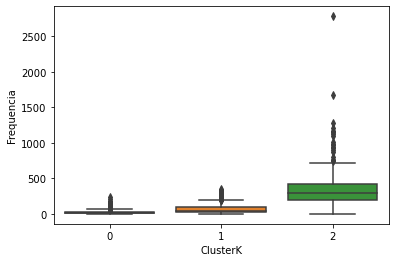

In [18]:
# Box plot para visualizar o Frequencia

sns.boxplot(x='ClusterK', y='Frequencia', data=df_agregado)

<AxesSubplot:xlabel='ClusterK', ylabel='Recencia'>

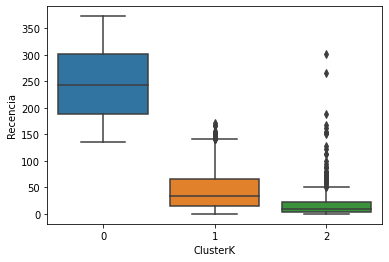

In [19]:
# Box plot para visualizar o Recencia
#
sns.boxplot(x='ClusterK', y='Recencia', data=df_agregado)

## Algoritmo do Agrupamento Hierarquico

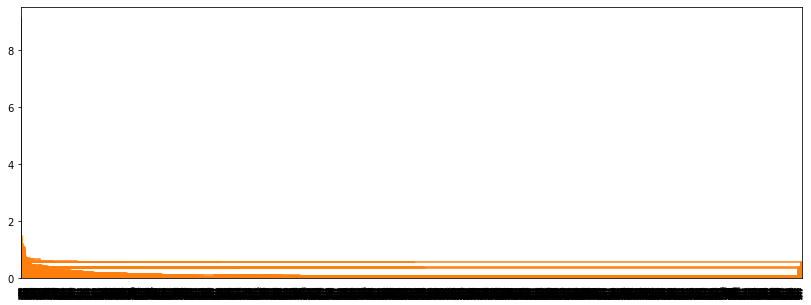

In [20]:
#Para o single linkage temos
plt.figure(figsize=(14,5))
mergings = linkage(df_agregado_norm, method="single", metric='euclidean')
dendrogram(mergings)
plt.show(True)

In [21]:
# Persistindo para uma k = 3
df_agregado['ClusterHSingle'] = cut_tree(mergings, n_clusters=3).reshape(-1, )

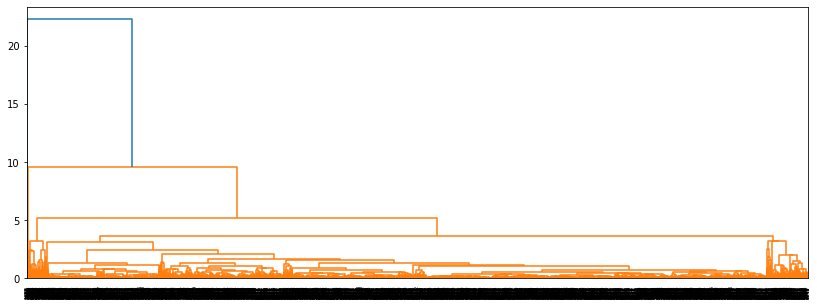

In [27]:
#Para o average linkage temos
plt.figure(figsize=(14,5))
mergings = linkage(df_agregado_norm, method="average", metric='euclidean')
dendrogram(mergings)
plt.show(True)

In [28]:
# Persistindo para uma k = 3
df_agregado['ClusterHAvg'] = cut_tree(mergings, n_clusters=3).reshape(-1, )

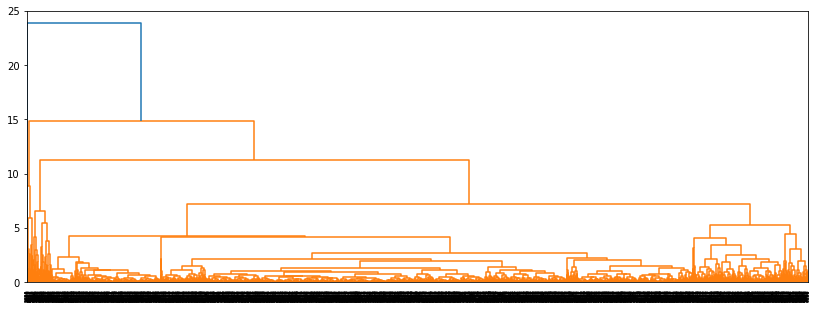

In [29]:
#Para o complete linkage temos
plt.figure(figsize=(14,5))
mergings = linkage(df_agregado_norm, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show(True)

In [30]:
# Persistindo para uma k = 3
df_agregado['ClusterHComp'] = cut_tree(mergings, n_clusters=3).reshape(-1, )

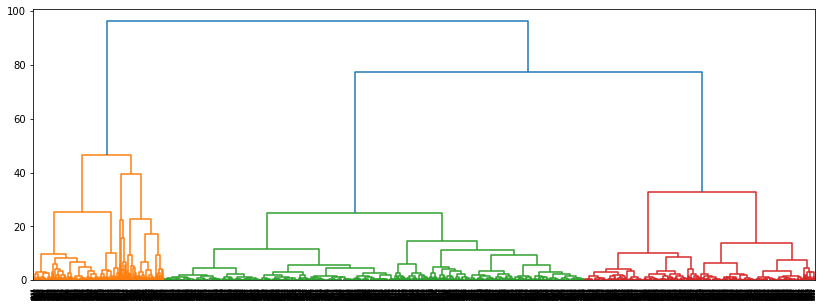

In [32]:
#Para o método de Ward's temos
plt.figure(figsize=(14,5))
mergings = linkage(df_agregado_norm, method="ward", metric='euclidean')
dendrogram(mergings)
plt.show(True)

In [33]:
# Persistindo para uma k = 3
df_agregado['ClusterHWard'] = cut_tree(mergings, n_clusters=3).reshape(-1, )

In [34]:
print('Single-Linkage Silhouette score:', silhouette_score(df_agregado_norm, df_agregado['ClusterHSingle'], metric='euclidean'))
print('Complete-Linkage Silhouette score:', silhouette_score(df_agregado_norm, df_agregado['ClusterHComp'], metric='euclidean'))
print('Average Linkage Silhouette score:', silhouette_score(df_agregado_norm, df_agregado['ClusterHAvg'], metric='euclidean'))
print("Ward's Silhouette score:", silhouette_score(df_agregado_norm, df_agregado['ClusterHWard'], metric='euclidean'))

Single-Linkage Silhouette score: 0.8499536834235714
Complete-Linkage Silhouette score: 0.7301221414858363
Average Linkage Silhouette score: 0.7932492947578468
Ward's Silhouette score: 0.4687887845233468


### Como ficou o padrão de consumo para cada cluster?

<AxesSubplot:xlabel='ClusterHWard', ylabel='Valor'>

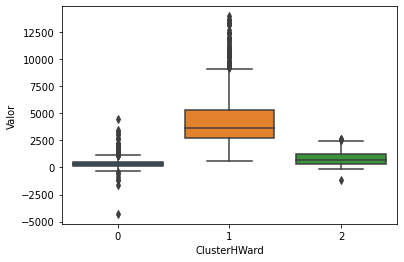

In [35]:
# Box plot para visualizar o Valor

sns.boxplot(x='ClusterHWard', y='Valor', data=df_agregado)

<AxesSubplot:xlabel='ClusterHWard', ylabel='Frequencia'>

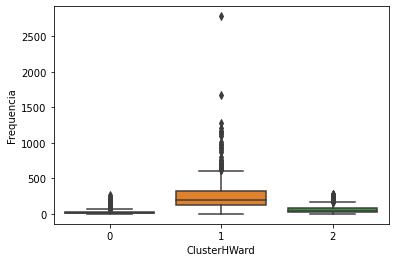

In [36]:
# Box plot para visualizar o Frequencia

sns.boxplot(x='ClusterHWard', y='Frequencia', data=df_agregado)

<AxesSubplot:xlabel='ClusterHWard', ylabel='Recencia'>

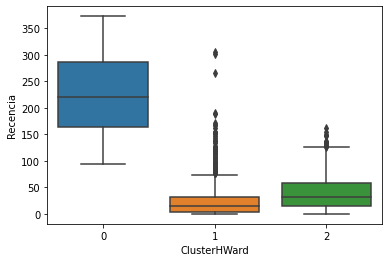

In [37]:
# Box plot para visualizar o Recencia
#
sns.boxplot(x='ClusterHWard', y='Recencia', data=df_agregado)

In [47]:
df_agregado.groupby('ClusterK').count()['Cliente']

ClusterK
0    1071
1    2817
2     426
Name: Cliente, dtype: int64

In [48]:
df_agregado.groupby('ClusterK').count()['Cliente']/df_agregado.shape[0]

ClusterK
0    0.248261
1    0.652990
2    0.098748
Name: Cliente, dtype: float64

In [49]:
df_agregado.groupby('ClusterHWard').count()['Cliente']

ClusterHWard
0    1267
1     721
2    2326
Name: Cliente, dtype: int64

In [50]:
df_agregado.groupby('ClusterHWard').count()['Cliente']/df_agregado.shape[0]

ClusterHWard
0    0.293695
1    0.167130
2    0.539175
Name: Cliente, dtype: float64

In [64]:
df_agregado[((df_agregado['ClusterHWard'] == 1 ) & (df_agregado['ClusterK'] == 2))].groupby('ClusterK').count()['Cliente']

ClusterK
2    426
Name: Cliente, dtype: int64

In [65]:
df_agregado[((df_agregado['ClusterHWard'] == 0 ) & (df_agregado['ClusterK'] == 0))].groupby('ClusterK').count()['Cliente']

ClusterK
0    1068
Name: Cliente, dtype: int64

## Interpretação:

#### Agrupamento K-Means, com k = 3.

Pelo k-means podemos destacar algumas características da amostra:

	- A persona do grupo 2 é bem interessante, representa 10% da amostra, tem um padrão alto (o maior em média) de gastos na plataforma e a melhor frequência de compras, mas em contra partida está em média com os menóres níveis de recência. Ou seja, é um público altamente lucrativo que está perdendo interesse nos produtos. Cabe-se talvez uma iniciativa de reativação de leads.
	- A persona do grupo 0 é a mais recente na operação (24%), uma nova leva de clientes que ainda não tem o hábito alto e nem frequente de consumo, mas que pode ser promissora.
	
	

#### Agrupamento Hierárquico com 3 clusters.

Apesar de ser um pouco mais abrangente nos grupos de interesse, obtemos praticamente as mesmas personas com o agrupamento hierárquico. Por aqui, o grupo 1 tem 16% da amostra e é equivalente ao grupo 2 pelo k-means. Pode-se verificar uma interseção entre esses dois grupos, misturando as técnicas, os registros encontrados pelo k-means estão todos inclusos na técnica hierárquica.

Da mesma forma para os dois grupos 0, equivalentes, no hierarquico com 29% da amostra e na intersecção com o k-means, apenas 3 do k-means não foram classficados com 0 no hierárquico.

## Next-steps

- Aprofundar nas técnicas de detecção de outlier (ISO e LOF, PCA)
- Descrever as técnicas de agrupamento por densidade (DBSCAN) e de distribuição (GMM)